In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plot
import pandas as pd

In [4]:
df=pd.read_csv('BTC-USD-300.csv', sep=',',header=None)

In [40]:
npar = df.values

In [6]:
a=df[5]

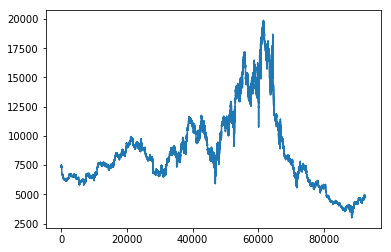

In [7]:
plot.plot(a)

In [8]:
b=df[6]

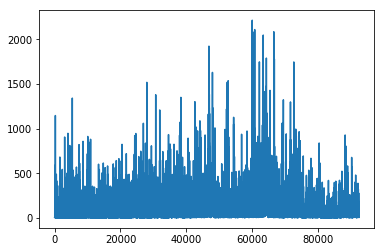

In [9]:
plot.plot(b)

In [10]:
c=df[1]

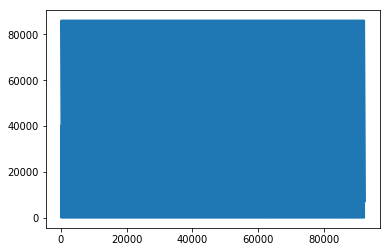

In [11]:
plot.plot(c)

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [57]:
dfTrain = npar[0:79992]
dfTest = npar[79993:92518]

In [58]:
dfTrain.shape

(79992, 7)

In [51]:
dfTest.shape

(12517, 7)

In [20]:
neurons = 512                 
activation_function = 'tanh'  
loss = 'mse'                  
optimizer="adam"              
dropout = 0.25                 
batch_size = 12               
epochs = 53                   
window_len = 7

In [21]:
def build_model(inputs, output_size, neurons, activ_func=activation_function, dropout=dropout, loss=loss, optimizer=optimizer):
  """
  inputs: input data as numpy array
  output_size: number of predictions per input sample
  neurons: number of neurons/ units in the LSTM layer
  active_func: Activation function to be used in LSTM layers and Dense layer
  dropout: dropout ration, default is 0.25
  loss: loss function for calculating the gradient
  optimizer: type of optimizer to backpropagate the gradient
  This function will build 3 layered RNN model with LSTM cells with dripouts after each LSTM layer 
  and finally a dense layer to produce the output using keras' sequential model.
  Return: Keras sequential model and model summary
  """
  model = Sequential()
  model.add(LSTM(neurons, return_sequences=True, input_shape=(inputs.shape[1], inputs.shape[2]), activation=activ_func))
  model.add(Dropout(dropout))
  model.add(LSTM(neurons, return_sequences=True, activation=activ_func))
  model.add(Dropout(dropout))
  model.add(LSTM(neurons, activation=activ_func))
  model.add(Dropout(dropout))
  model.add(Dense(units=output_size))
  model.add(Activation(activ_func))
  model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
  model.summary()
  return model

In [22]:
X_train = np.split(dfTrain, 12)

ValueError: array split does not result in an equal division

In [28]:
import math
X_train = np.split(dfTrain, 1)

In [32]:
X_train[0]

,0,1,2,3,4,5,6
0,2018-07-18T13:10:00+00:00,40200,7399.14,7400.61,7399.15,7400.60,3.679729
1,2018-07-18T13:05:00+00:00,39900,7391.43,7411.81,7411.81,7399.14,11.549447
2,2018-07-18T13:00:00+00:00,39600,7405.00,7413.36,7405.00,7411.81,10.670676
3,2018-07-18T12:55:00+00:00,39300,7405.00,7414.06,7409.16,7405.00,9.079759
4,2018-07-18T12:50:00+00:00,39000,7390.00,7409.15,7390.00,7409.15,12.562598
5,2018-07-18T12:45:00+00:00,38700,7387.55,7390.00,7389.00,7389.99,68.980528
6,2018-07-18T12:40:00+00:00,38400,7375.00,7389.00,7376.75,7389.00,32.989639
7,2018-07-18T12:35:00+00:00,38100,7376.75,7396.87,7396.87,7376.75,12.253839
8,2018-07-18T12:30:00+00:00,37800,7396.86,7410.01,7410.01,7396.87,18.426706
9,2018-07-18T12:25:00+00:00,37500,7410.00,7415.09,7415.06,7410.01,18.434437


In [55]:
def create_inputs(data, window_len=12):
  """
  data: pandas DataFrame, this could be either training_set or test_set
  coins: coin datas which will be used as the input. Default is 'btc', 'eth'
  window_len: is an intiger to be used as the look back window for creating a single input sample.
  This function will create input array X from the given dataset and will normalize 'Close' and 'Volume' between 0 and 1
  Return: X, the input for our model as a python list which later needs to be converted to numpy array.
  """
  inputs = np.array()
  for i in range(len(data) - window_len):
    temp_set = data[i:(i + window_len)].copy()
    inputs.append(temp_set)
  return inputs

In [59]:
X_train = np.reshape(dfTrain, (6666, 12, 7))

In [60]:
X_train.shape

(6666, 12, 7)

In [61]:
X_train

array([[['2018-07-18T13:10:00+00:00', 40200, 7399.14, ..., 7399.15,
         7400.6, 3.67972873],
        ['2018-07-18T13:05:00+00:00', 39900, 7391.43, ..., 7411.81,
         7399.14, 11.54944743],
        ['2018-07-18T13:00:00+00:00', 39600, 7405.0, ..., 7405.0,
         7411.81, 10.67067561],
        ...,
        ['2018-07-18T12:25:00+00:00', 37500, 7410.0, ..., 7415.06,
         7410.01, 18.4344367],
        ['2018-07-18T12:20:00+00:00', 37200, 7413.25, ..., 7413.25,
         7415.06, 6.45145631],
        ['2018-07-18T12:15:00+00:00', 36900, 7413.25, ..., 7425.0,
         7413.26, 18.03508448]],

       [['2018-07-18T12:10:00+00:00', 36600, 7420.28, ..., 7420.29,
         7425.0, 13.68075348],
        ['2018-07-18T12:05:00+00:00', 36300, 7412.1, ..., 7412.1,
         7420.29, 28.386814899999997],
        ['2018-07-18T12:00:00+00:00', 36000, 7400.0, ..., 7400.0,
         7412.1, 5.83580686],
        ...,
        ['2018-07-18T11:25:00+00:00', 33900, 7368.0, ..., 7390.07,
         7368

In [62]:
Y_train = npar[12:80004]

In [63]:
Y_train = Y_train[:, 3]

In [64]:
Y_train.shape

(79992,)

In [65]:
Y_train

array([7425.0, 7430.85, 7412.11, ..., 5709.34, 5709.69, 5708.0],
      dtype=object)

In [66]:
Y_train = np.reshape(Y_train, (6666,12,1))

In [67]:
Y_train.shape

(6666, 12, 1)

In [70]:
neurons = 512                 
activation_function = 'tanh'  
loss = 'mse'                  
optimizer="adam"              
dropout = 0.25                 
batch_size = 12               
epochs = 53                   
window_len = 12               
training_size = 0.8

In [69]:
btc_model = build_model(X_train, output_size=1, neurons=neurons)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12, 512)           1064960   
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 512)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 12, 512)           2099200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 512)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
__________

In [74]:
X_test = dfTest = npar[79993:91993]

In [75]:
X_test.shape

(12000, 7)

In [76]:
Y_test = npar[79993+12:91993+12]

In [77]:
X_test = np.reshape(X_test, (1000, 12, 7))

In [78]:
Y_test = Y_test[:, 3]

In [79]:
Y_test = np.reshape(Y_test, (1000,12,1))

In [80]:
btc_history = btc_model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, Y_test), shuffle=False)

ValueError: Error when checking target: expected activation_1 to have 2 dimensions, but got array with shape (6666, 12, 1)